In [55]:
# Philip Walsh
# philipwalsh.ds@gmail.com
# 2019-12-19
# Exploratory Data Analysis
# Kaggle - House Prices: Advanced Regression Techniques
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression

In [56]:
def best_fit(X, Y):
    # to plot the line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    # aziz alto
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [ ]:
##usage
##best fit line:
##y = 0.80 + 0.92x
#
#a, b = best_fit(X, Y)
#
## plot points and fit line
#plt.scatter(X, Y)
#yfit = [a + b * xi for xi in X]
#plt.plot(X, yfit)

In [57]:
train_data = pd.read_csv('excluded/train_full.csv', low_memory=False)

In [58]:
train_data.shape

(1460, 81)

In [59]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
# look for missing data
pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_rows', None)
train_data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x19f130cd748>,
 'caps': [<matplotlib.lines.Line2D at 0x19f130cddc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f130cd148>],
 'medians': [<matplotlib.lines.Line2D at 0x19f130d3d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f130d3e48>],
 'means': []}

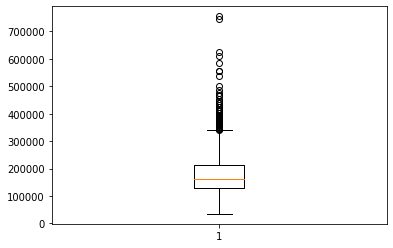

In [63]:
# SalePrice prediction is the goal.  The label, aka y, aka dependent variable
plt.boxplot(train_data['SalePrice'])

In [64]:
# lotFrontage was identified as a column with missing data
# let's do a quick fill
temp_mean = train_data['LotFrontage'].mean()
temp_mean
train_data['LotFrontage'].fillna(temp_mean, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19f1312cd88>,
 'caps': [<matplotlib.lines.Line2D at 0x19f13134e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f1312cc88>],
 'medians': [<matplotlib.lines.Line2D at 0x19f13134f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f13139e48>],
 'means': []}

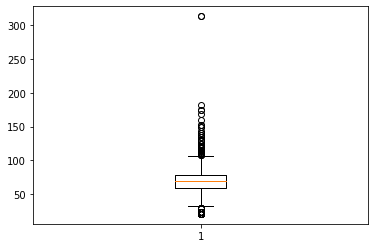

In [65]:
# Have a quick look at the boxplot
plt.boxplot(train_data['LotFrontage'])

best fit line:
y = 96299.76 + 1208.02x


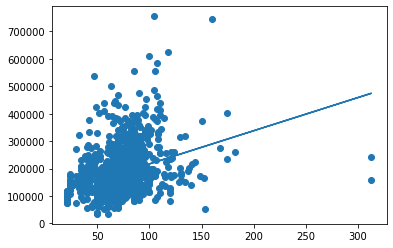

In [66]:
#scatter plot of LotFrontage vs SalePrice
# add in line of best fit as well
X = train_data['LotFrontage']
Y = train_data['SalePrice']
a, b = best_fit(X, Y)
# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [67]:
#GrLivArea - Above grade (ground) living area square feet
#is important
# so lets have a look
# any NaN(s)
train_data['GrLivArea'].isna().any()

False

{'whiskers': [<matplotlib.lines.Line2D at 0x19f1325b808>,
 'caps': [<matplotlib.lines.Line2D at 0x19f1325bfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f13257e88>],
 'medians': [<matplotlib.lines.Line2D at 0x19f13264a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f13264b88>],
 'means': []}

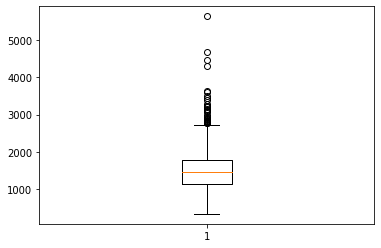

In [69]:
plt.boxplot(train_data['GrLivArea'])

best fit line:
y = 18569.03 + 107.13x


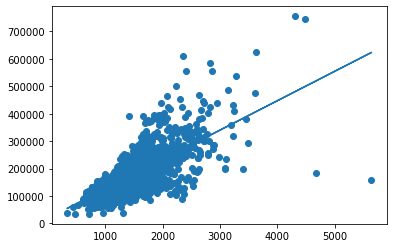

In [70]:
X = train_data['GrLivArea']
Y = train_data['SalePrice']
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [73]:
#I will split the train data into tran and test (aka hold out)
# set up bins for the stratified split
train_data['living_area_cat'] = pd.cut(
    train_data['GrLivArea'], 
    bins=[0, 500, 1000, 1500, 2000, 2500, np.inf], 
    labels=[1, 2, 3, 4, 5, 6])

In [74]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=9261774)
for train_index, test_index in split.split(train_data, train_data['living_area_cat']):
    X_train = train_data.iloc[train_index].copy() # this is the training data
    X_test = train_data.iloc[test_index].copy()   # this is the hold out, the protion of the training i will use for testing

In [75]:
X_train.shape

(1168, 82)

In [76]:
X_test.shape

(292, 82)

In [77]:
train_cols = ['LotFrontage','GrLivArea']

In [78]:
# set up the y aka the label
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop SalePrice from the x vars
X_train.drop('SalePrice', axis=1, inplace=True)
X_test.drop('SalePrice', axis=1, inplace=True)

In [79]:
### Fit a linear regression model
model_lr = LinearRegression(normalize=False)
model_lr.fit(X_train[train_cols], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
## score the model
train_score_lm=model_lr.score(X_train[train_cols], y_train)
test_score_lm=model_lr.score(X_test[train_cols], y_test)
print('lm training score     : ', train_score_lm)
print('lm test score         : ', test_score_lm)

lm training score     :  0.5049479993923547
lm test score         :  0.5133880229709693


In [83]:
# do a pricitction on the hold out data
predicted = pd.DataFrame(model_lr.predict(X_test[train_cols]))
# put 
expected = y_test

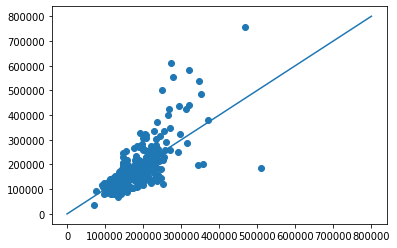

In [84]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([0,800000],[0,800000])
plt.scatter(predicted, expected)

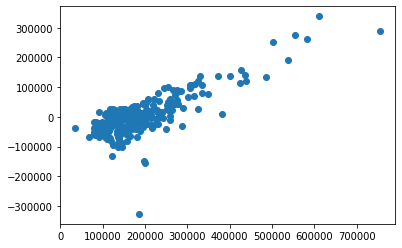

In [98]:
residuals = np.array(expected.values.ravel()) - np.array(predicted.values.ravel())
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern
# a pattern in the plot means we missed in capturing the data thats driving sale price

In [85]:
test_data = pd.read_csv('excluded/test_full.csv', low_memory=False)
test_data.shape

(1459, 80)

In [88]:
# this is an over simplified example only to get to the submisison file quicker
# for the vars we are about to use in the predict cal, are there any NaN(s)?
test_data[train_cols].isna().any()

#in reality you would have a more robust data cleaning process that cleans the train/hold out/test all at the same time

LotFrontage     True
GrLivArea      False
dtype: bool

In [89]:
test_data.fillna(temp_mean, inplace=True)

In [90]:
 ### predict the model
pred_id = test_data[['Id']]
pred_y_lr=model_lr.predict(test_data[train_cols])
# tack the saved labes (y's) onto the preds into a data frame
pred_lr=pd.DataFrame(pred_y_lr, columns=['SalePrice'])
submission_lr = pd.concat([pred_id,pred_lr], axis='columns', sort=False)


In [91]:
submission_lr.shape

(1459, 2)

In [92]:
submission_lr.head()

,Id,SalePrice
0,1461,121896.352580
1,1462,164947.927861
2,1463,192299.719298
3,1464,191120.123714
4,1465,147881.428309


In [93]:
### save submission file
submission_lr.to_csv('excluded/predictions_lr-jupiter-eda.csv',index=False)

In [ ]:
# the above code received a kaggle score of 0.28700
# 5105/5749
# To improve upon the score
# More data analysis needed
# Practically every independent variable in this dataset is useful
# there are a few variablex that have excessive NaN(s), probably best to drop the variables
# Create combined columns, ex total bathroom count, total overall condition score
# Separate the "categorical" type columns into numeric categoricals and one hot encoded variables
# create additional models and ensemble them together
#    model_rf = RandomForestRegressor(random_state=9261774, n_estimators=400, ...
#    model_gb = GradientBoostingRegressor(random_state=9261774,learning_rate=0.025,...
#    ...
#    submission_lr_rf_gb['SalePrice']=(
#        submission_lr_rf_gb['SalePrice_LR'] * 0.20 +
#        submission_lr_rf_gb['SalePrice_RF'] * 0.30 +
#        submission_lr_rf_gb['SalePrice_GB'] * 0.50 )
# 
# my best score, with a few days of data cleaning/feature engineering
#
# 0.12593
# 1744/5749